In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 


In [2]:
data = pd.read_excel(r"F:/aqar/cleaned.xlsx")
res=pd.DataFrame()
data.head()

,link,Adtitle,price,address,area,bedrooms,bathrooms,sale_or_rent,unit,aqar type,price/meter^2
0,https://aqarmap.com.eg//en/listing/4375249-for...,Full Floor For sale in Corniche El Nile Direct...,150000000,"كورنيش النيل, الدقي",586,7,6,N,apartment,residential,255972.696246
1,https://aqarmap.com.eg//en/listing/4282509-for...,#0شقق بالقاهرة الجديده تجمع خامس شمال بيت الوطن,2100000,"شمال بيت الوطن, بيت الوطن",140,3,2,N,apartment,residential,15000.000000
2,https://aqarmap.com.eg//en/listing/4288102-for...,"Apartments for sale in the Fourth District, Be...",3001500,"الحي الرابع, بيت الوطن",207,4,3,N,apartment,residential,14500.000000
3,https://aqarmap.com.eg//en/listing/4282059-for...,#0 Apartments for sale in installments in the ...,3132000,"الحي الرابع, بيت الوطن",232,4,3,N,apartment,residential,13500.000000
4,https://aqarmap.com.eg//en/listing/4009475-for...,Apartments For Sale in Nbq,2800000,Golf Heights Resort - Sharm El Sheikh، Sharm E...,88,1,1,N,apartment,residential,31818.181818


In [3]:
data.shape


(3125, 11)

In [4]:
data.describe()

,price,area,price/meter^2
count,3.125000e+03,3125.000000,3125.000000
mean,2.792388e+06,267.293120,17107.346163
std,7.949772e+06,478.176631,30469.621485
min,7.500000e+02,8.000000,2.500000
25%,4.500000e+04,100.000000,191.666667
50%,2.400000e+05,170.000000,7500.000000
75%,3.550000e+06,260.000000,23750.000000
max,2.400000e+08,6400.000000,600000.000000


In [5]:
data.columns

Index(['link', 'Adtitle', 'price', 'address', 'area', 'bedrooms', 'bathrooms',
       'sale_or_rent', 'unit', 'aqar type', 'price/meter^2'],
      dtype='object')

In [6]:
data.nunique()


link             2625
Adtitle          2075
price             728
address          1179
area              356
bedrooms           27
bathrooms          20
sale_or_rent        4
unit                6
aqar type           3
price/meter^2    1369
dtype: int64

In [7]:
data['unit'].unique()

array(['apartment', 'land-or-commercial', 'villa', 'commercial',
       'furnished-apartment', 'property-type'], dtype=object)

In [8]:
data.isnull().sum()

link               0
Adtitle            3
price              0
address            0
area               0
bedrooms         833
bathrooms        853
sale_or_rent       0
unit               0
aqar type          0
price/meter^2      0
dtype: int64

In [9]:
df1 = data[data['Adtitle'].isna()]
df1

,link,Adtitle,price,address,area,bedrooms,bathrooms,sale_or_rent,unit,aqar type,price/meter^2
290,https://aqarmap.com.eg//en/listing/4198584-for...,NaN,2228000,"مجموعة 113, المنطقه الحاديه عشر عمارات",96,2,2,N,apartment,residential,23208.333333
1657,https://aqarmap.com.eg//en/listing/4300026-for...,NaN,1800000,"شارع كارفور الرئيسي, زهراء المعادي",145,3,1,N,furnished-apartment,residential,12413.793103
2576,https://aqarmap.com.eg//en/listing/4198584-for...,NaN,2228000,"مجموعة 113, المنطقه الحاديه عشر عمارات",96,2,2,N,apartment,residential,23208.333333


In [10]:
data.isnull().sum()

link               0
Adtitle            3
price              0
address            0
area               0
bedrooms         833
bathrooms        853
sale_or_rent       0
unit               0
aqar type          0
price/meter^2      0
dtype: int64

In [11]:
data.reset_index(drop=True, inplace=True)

<AxesSubplot:>

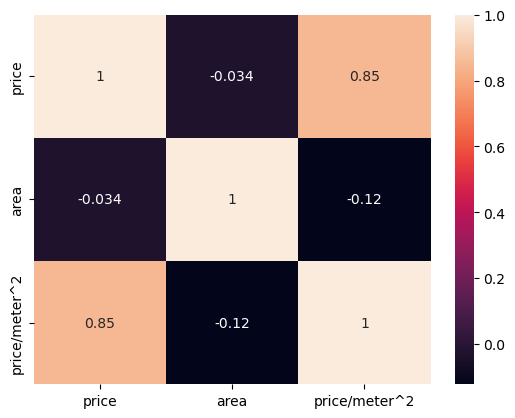

In [12]:
corelation=data.corr(method='pearson')
sns.heatmap(corelation,xticklabels=corelation.columns,yticklabels=corelation.columns,annot=True)
#corelation.columns

In [13]:
data.corr()

,price,area,price/meter^2
price,1.000000,-0.033539,0.850617
area,-0.033539,1.000000,-0.122229
price/meter^2,0.850617,-0.122229,1.000000


In [14]:
corelation

,price,area,price/meter^2
price,1.000000,-0.033539,0.850617
area,-0.033539,1.000000,-0.122229
price/meter^2,0.850617,-0.122229,1.000000


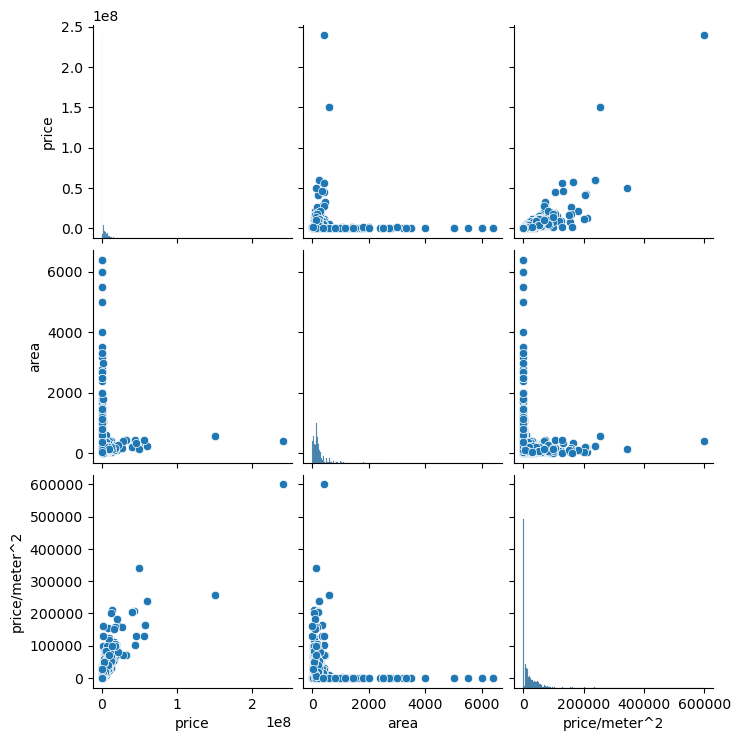

In [15]:
sns.pairplot(data)


C:\Users\ok\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

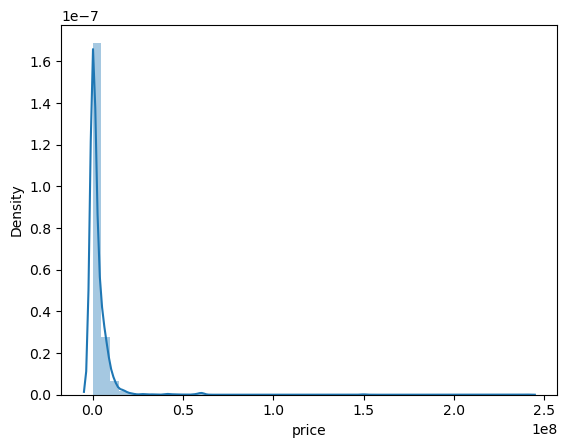

In [16]:
sns.distplot(data['price'])

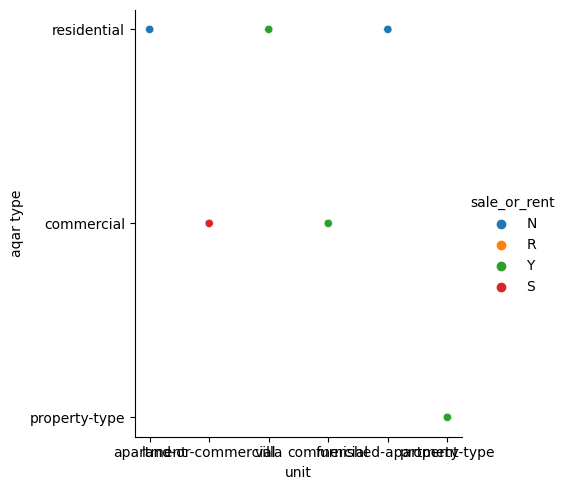

In [17]:
sns.relplot(
    data=data,
    x="unit", y="aqar type",
    hue="sale_or_rent", 
)

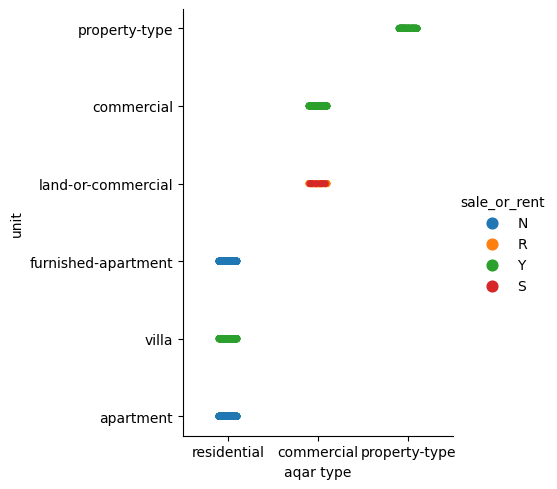

In [18]:
sns.catplot(
    data=data,
    x="aqar type", y="unit",
    hue="sale_or_rent", 
)

In [19]:
rent_data_appartment=data.loc[((data['sale_or_rent']=='S')&(data['unit']=='apartment'))]
print(len(rent_data_appartment))
#sns.boxplot(rent_data_appartment['price'])
print(type(rent_data_appartment))


0
<class 'pandas.core.frame.DataFrame'>


0
0


C:\Users\ok\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ok\AppData\Local\Temp\ipykernel_3396\1933843288.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(df_no_outliers_zscore)


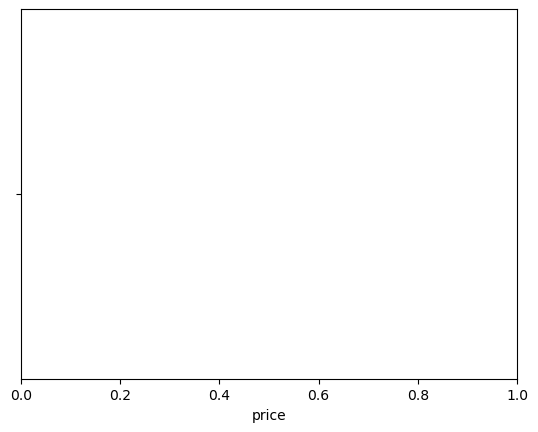

In [20]:
from scipy import stats
# Calculate z-scores
z_scores = stats.zscore(rent_data_appartment['price'])

# Define a threshold for outlier detection (adjust as needed)
threshold = 1

# Identify and remove outliers
df_no_outliers_zscore = rent_data_appartment[(z_scores < threshold) & (z_scores > -threshold)]

# Display the DataFrame without outliers
sns.boxplot(df_no_outliers_zscore['price'])
res = res.append(df_no_outliers_zscore)
#print(df_no_outliers_zscore)
print(len(res))
print(len(df_no_outliers_zscore))


391


C:\Users\ok\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

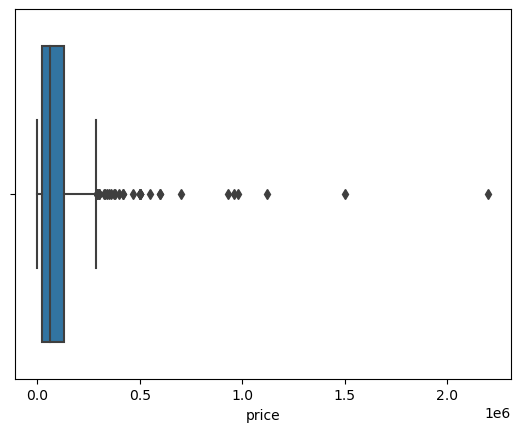

In [21]:
rent_data_commercial=data.loc[((data['sale_or_rent']=='Y')&(data['unit']=='commercial'))]
print(len(rent_data_commercial))
sns.boxplot(rent_data_commercial['price'])

311


C:\Users\ok\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ok\AppData\Local\Temp\ipykernel_3396\4200229661.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(df_no_outliers_zscore)


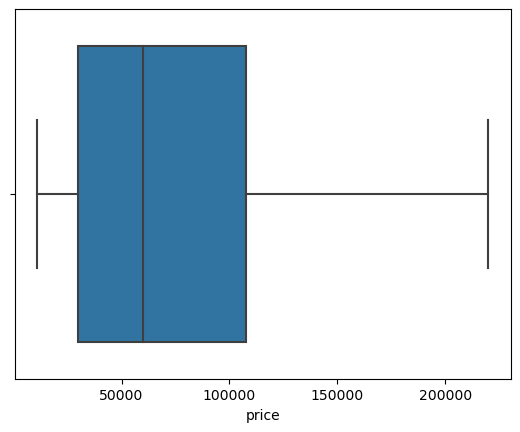

In [22]:
from scipy import stats
# Calculate z-scores
z_scores = stats.zscore(rent_data_commercial['price'])

# Define a threshold for outlier detection (adjust as needed)
threshold = 0.55

# Identify and remove outliers
df_no_outliers_zscore = rent_data_commercial[(z_scores < threshold) & (z_scores > -threshold)]

# Display the DataFrame without outliers
sns.boxplot(df_no_outliers_zscore['price'])

res = res.append(df_no_outliers_zscore)
#print(df_no_outliers_zscore)
print(len(res))

7


C:\Users\ok\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

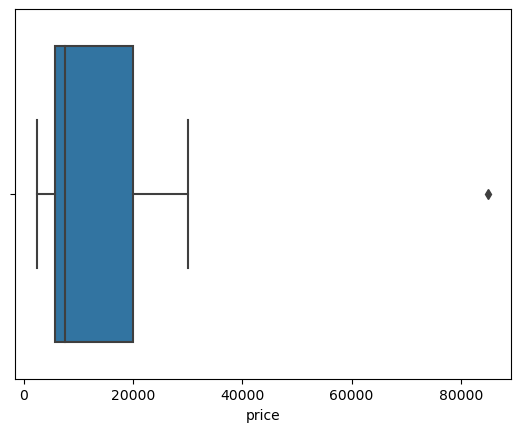

In [23]:
rent_data_land_or_commercial=data.loc[((data['sale_or_rent']=='S')&(data['unit']=='land-or-commercial'))]
print(len(rent_data_land_or_commercial))
sns.boxplot(rent_data_land_or_commercial['price'])


0


C:\Users\ok\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

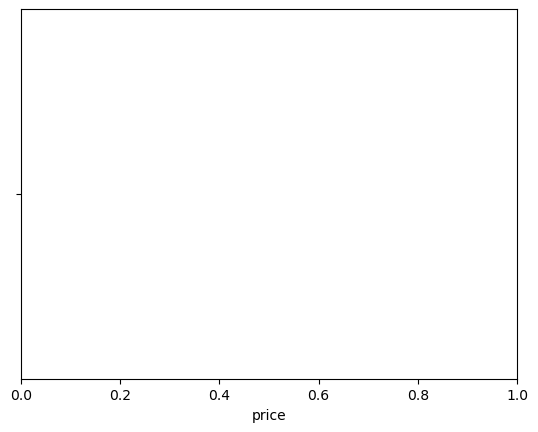

In [24]:
rent_data_property_type=data.loc[((data['sale_or_rent']=='S')&(data['unit']=='property-type'))]
print(len(rent_data_property_type))
sns.boxplot(rent_data_property_type['price'])

311


C:\Users\ok\AppData\Local\Temp\ipykernel_3396\641739227.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(df_no_outliers_zscore)


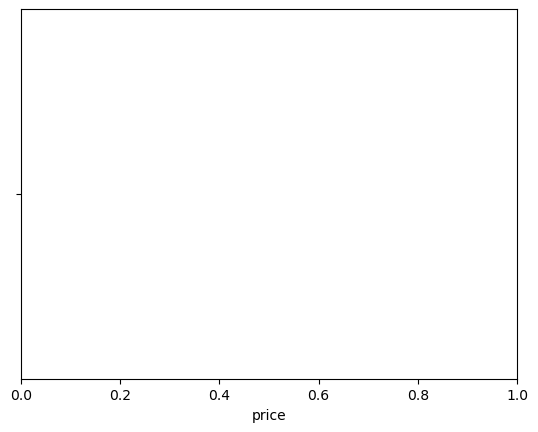

In [25]:
from scipy import stats
# Calculate z-scores
z_scores = stats.zscore(rent_data_property_type['price'])

# Define a threshold for outlier detection (adjust as needed)
threshold =.38


# Identify and remove outliers
df_no_outliers_zscore = rent_data_property_type[(z_scores < threshold) & (z_scores > -threshold)]

# Display the DataFrame without outliers
sns.boxplot(df_no_outliers_zscore['price'])
res = res.append(df_no_outliers_zscore)
#print(df_no_outliers_zscore)
print(len(res))

363


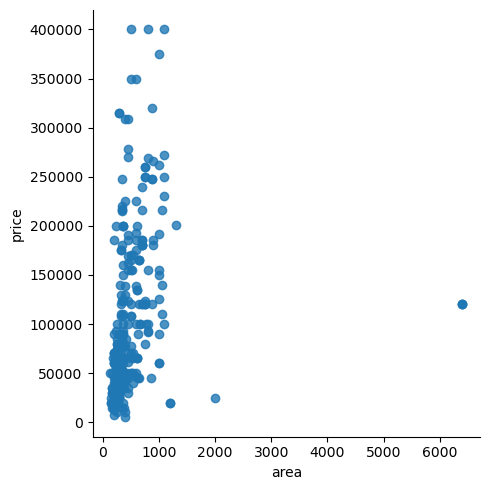

In [36]:
rent_data_villa=data.loc[((data['sale_or_rent']=='Y')&(data['unit']=='villa'))]
print(len(rent_data_villa))
#sns.boxplot(rent_data_villa['price'])
sns.lmplot(data=rent_data_villa,x='area',y='price',fit_reg=False)

311


C:\Users\ok\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ok\AppData\Local\Temp\ipykernel_3396\3033188963.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(df_no_outliers_zscore)


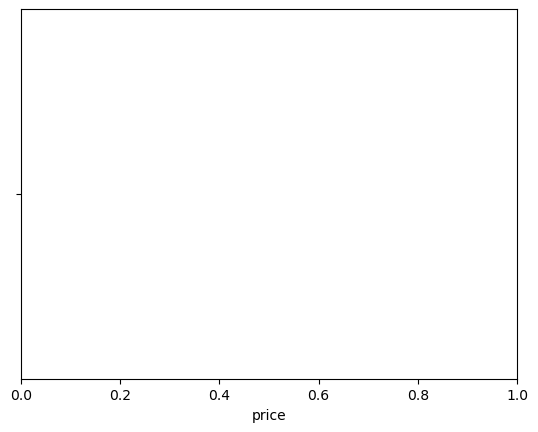

In [27]:
from scipy import stats
# Calculate z-scores
z_scores = stats.zscore(rent_data_villa['price'])

# Define a threshold for outlier detection (adjust as needed)
threshold =1.4



# Identify and remove outliers
df_no_outliers_zscore = rent_data_villa[(z_scores < threshold) & (z_scores > -threshold)]

# Display the DataFrame without outliers
sns.boxplot(df_no_outliers_zscore['price'])
res = res.append(df_no_outliers_zscore)
#print(df_no_outliers_zscore)
print(len(res))



831


C:\Users\ok\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

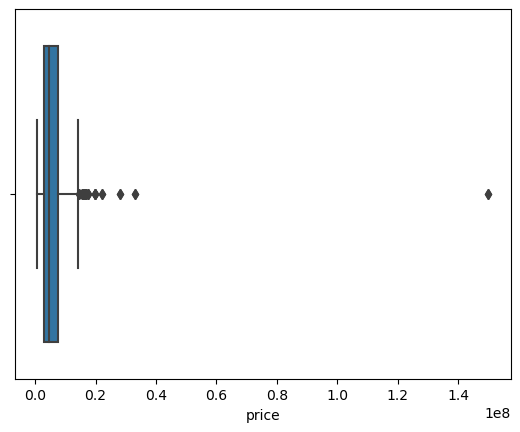

In [28]:
sale_data_apartment=data.loc[((data['sale_or_rent']=='N')&(data['unit']=='apartment'))]
print(len(sale_data_apartment))
sns.boxplot(sale_data_apartment['price'])

C:\Users\ok\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1103


C:\Users\ok\AppData\Local\Temp\ipykernel_3396\994478318.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(df_no_outliers_zscore)


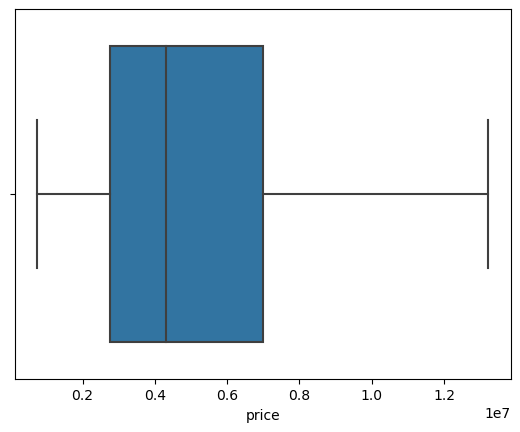

In [29]:
from scipy import stats
# Calculate z-scores
z_scores = stats.zscore(sale_data_apartment['price'])

# Define a threshold for outlier detection (adjust as needed)
threshold =0.9



# Identify and remove outliers
df_no_outliers_zscore = sale_data_apartment[(z_scores < threshold) & (z_scores > -threshold)]

# Display the DataFrame without outliers
sns.boxplot(df_no_outliers_zscore['price'])
res = res.append(df_no_outliers_zscore)
#print(df_no_outliers_zscore)
print(len(res))

392


C:\Users\ok\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

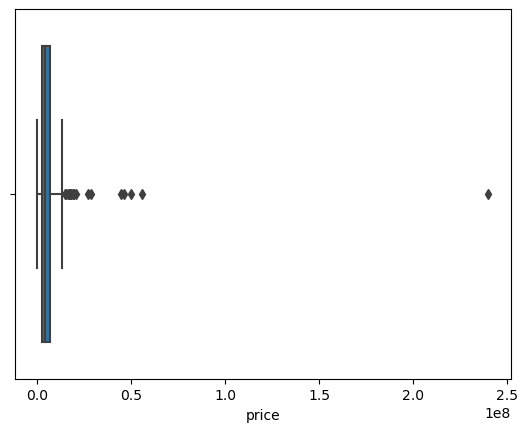

In [30]:
sale_data_furnished_apartment=data.loc[((data['sale_or_rent']=='N')&(data['unit']=='furnished-apartment'))]
print(len(sale_data_furnished_apartment))
sns.boxplot(sale_data_furnished_apartment['price'])

1442


C:\Users\ok\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ok\AppData\Local\Temp\ipykernel_3396\560194005.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(df_no_outliers_zscore)


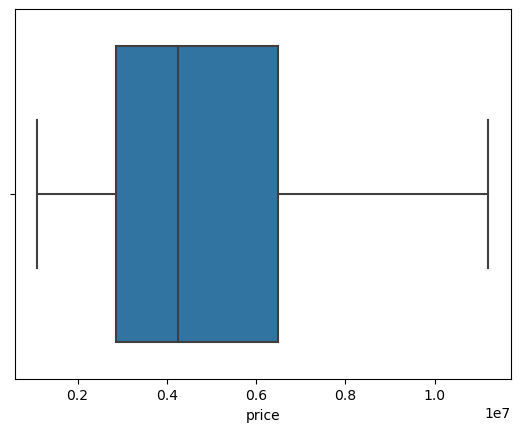

In [31]:
from scipy import stats
# Calculate z-scores
z_scores = stats.zscore(sale_data_furnished_apartment['price'])

# Define a threshold for outlier detection (adjust as needed)
threshold =0.4
# Identify and remove outliers
df_no_outliers_zscore = sale_data_furnished_apartment[(z_scores < threshold) & (z_scores > -threshold)]

# Display the DataFrame without outliers
sns.boxplot(df_no_outliers_zscore['price'])
res = res.append(df_no_outliers_zscore)
#print(df_no_outliers_zscore)
print(len(res))

0


C:\Users\ok\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

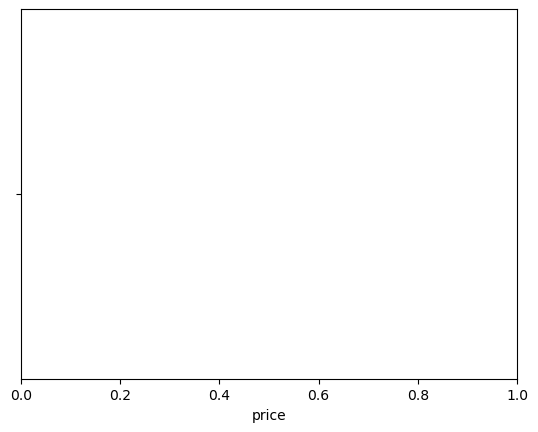

In [32]:
sale_data_land_or_commercial=data.loc[((data['sale_or_rent']=='N')&(data['unit']=='land-or-commercial'))]
print(len(sale_data_land_or_commercial))
sns.boxplot(sale_data_land_or_commercial['price'])

1442


C:\Users\ok\AppData\Local\Temp\ipykernel_3396\1724684942.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(df_no_outliers_zscore)


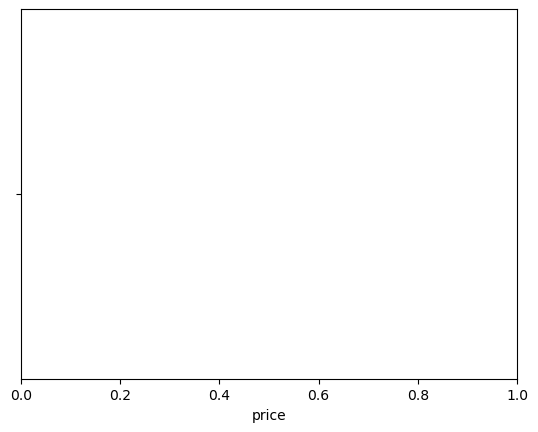

In [33]:
from scipy import stats
# Calculate z-scores
z_scores = stats.zscore(sale_data_land_or_commercial['price'])

# Define a threshold for outlier detection (adjust as needed)
threshold =0.2
# Identify and remove outliers
df_no_outliers_zscore = sale_data_land_or_commercial[(z_scores < threshold) & (z_scores > -threshold)]  

# Display the DataFrame without outliers
sns.boxplot(df_no_outliers_zscore['price'])
res = res.append(df_no_outliers_zscore)
#print(df_no_outliers_zscore)
print(len(res))

In [34]:
saveName='remove_outlier.xlsx'



writer = pd.ExcelWriter(saveName)
res.to_excel(writer, sheet_name='Sheet1',index=True)
writer.save()

